<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** María Fernanda Amador Alvarez y Gerardo Gónzalez Flores.

**Fecha:** 14 de octubre del 2021.

**Expediente** : 725573 y 721430.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/feramdor/Proyecto_Amador_Gonzalez

# Proyecto TEMA-2

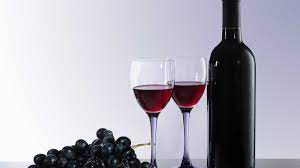


# Proyecto Módulo 2
> Se elegirá una base de datos de producción de vino tinto de la cuál se elegirán 4 variables de interés para la elaboración del proyecto.

___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Vinos FlorAmor.
> Queremos ver cuanto despedicio se tendrá en la producción del vino que se presentará a continuación. 

### 1.2 Objetivo General.
> - Medir la cantidad de desperdicio que se tendrá por lote en la producción de vino. 

#### 1.2 Objetivo específico
>  - Encontrar la distribución de pH del lote de vino.
>  - Encontrar la distribución de alcohol del lote de vino.
>  - Encontrar la distribución de acidez del lote de vino.
>  - Encontrar la distribución de sulfato del lote de vino.
>  - Simulación de 10,000 escenarios para encontrar el porcentaje % de desperdicio.


### 1.3 Definición del problema.
> Se plantearán condiciones para la elección del pH, azúcar, sulfato y alcohol que contenga el vino tinto. Una vez pasadas las condiciones de estas variables, se hará la simulación para obtener el porcentaje de despercio de la producción de vino tinto. 

### 1.4 Nodos y variables que se decidieron simular y porqué
>  - PH del lote de vino.
>  - Alcohol del lote de vino.
>  - Acidez del lote de vino.
>  - Sulfato del lote de vino.



### 1.6 Obtención de bases de datos
> **[Link Base de Datos](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)**

Se busco en la página **kaggle** varias base de datos, le elección de la base de datos de **vino tinto** nos pareció más interesante por la distrución que había de las variables que elgimos y porque no son distribuciones uniformes. 


### Diagrama
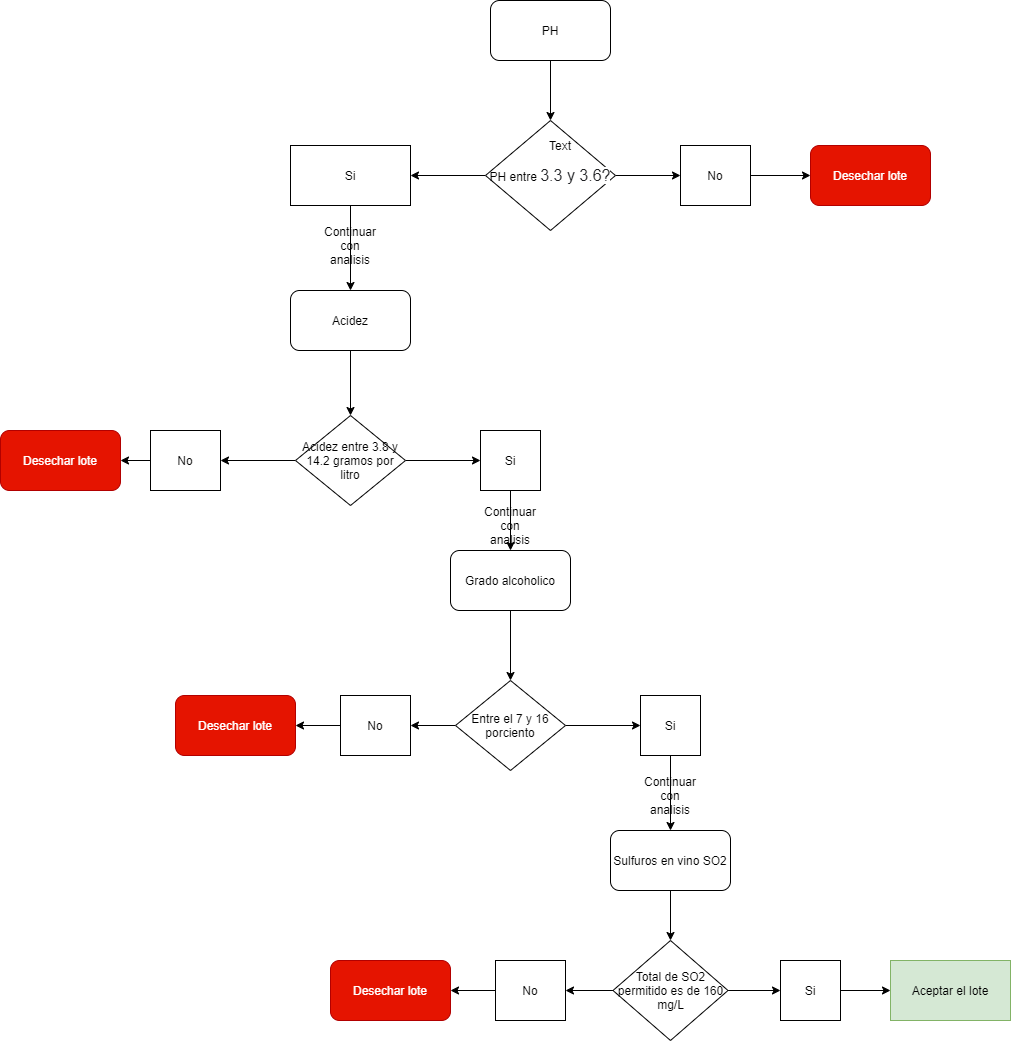

Datos que se van a usar para el análisis de nuestro data set.

In [3]:
# Importamos librerías
#Librerías:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot
import itertools

In [4]:
data = pd.read_csv('winequality-red.csv').dropna()
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Limpieza de Datos

Una vez que cargamos nuestro data set de la calidad del vino tinto, vamos a quitar las columnas que no nos sirven para solo quedarnos con las columnas que serán nuestras variables a simular para tener un aproximado del desperdicio por lote.

1. Dropeamos todas las variables excepto las de interés
2. Eliminamos todas las filas que contengan NA
3. Debido a que no encontramos ningún NA en nuestros datos, dejamos las variables de interés:
    1. Ácido Cítrico
    2. pH
    3. Sulfato
    4. Grado de Alcohol
4. Colocamos los histogramas para observar la distribución de nuestras variables de interés 

In [5]:
data = data.drop(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                  'free sulfur dioxide', 'total sulfur dioxide', 'density', 'quality'], axis = 1)
data

,fixed acidity,pH,sulphates,alcohol
0,7.4,3.51,0.56,9.4
1,7.8,3.20,0.68,9.8
2,7.8,3.26,0.65,9.8
3,11.2,3.16,0.58,9.8
4,7.4,3.51,0.56,9.4
5,7.4,3.51,0.56,9.4
6,7.9,3.30,0.46,9.4
7,7.3,3.39,0.47,10.0
8,7.8,3.36,0.57,9.5
9,7.5,3.35,0.80,10.5


In [6]:
data.describe()

,fixed acidity,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,3.311113,0.658149,10.422983
std,1.741096,0.154386,0.169507,1.065668
min,4.600000,2.740000,0.330000,8.400000
25%,7.100000,3.210000,0.550000,9.500000
50%,7.900000,3.310000,0.620000,10.200000
75%,9.200000,3.400000,0.730000,11.100000
max,15.900000,4.010000,2.000000,14.900000


In [7]:
# pH
data_ph = data['pH'].dropna()
data_ph

0       3.51
1       3.20
2       3.26
3       3.16
4       3.51
5       3.51
6       3.30
7       3.39
8       3.36
9       3.35
10      3.28
11      3.35
12      3.58
13      3.26
14      3.16
15      3.17
16      3.30
17      3.11
18      3.38
19      3.04
20      3.39
21      3.52
22      3.17
23      3.17
24      3.43
25      3.34
26      3.28
27      3.17
28      3.47
29      3.38
        ... 
1569    3.48
1570    3.37
1571    3.44
1572    3.33
1573    3.58
1574    3.39
1575    3.26
1576    3.30
1577    3.54
1578    3.42
1579    3.54
1580    3.36
1581    3.54
1582    3.57
1583    3.33
1584    3.29
1585    3.30
1586    3.34
1587    3.55
1588    3.27
1589    3.29
1590    3.32
1591    3.67
1592    3.42
1593    3.42
1594    3.45
1595    3.52
1596    3.42
1597    3.57
1598    3.39
Name: pH, Length: 1599, dtype: float64

In [8]:
# Acidez
data_a = data['fixed acidity'].dropna()
data_a

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
5        7.4
6        7.9
7        7.3
8        7.8
9        7.5
10       6.7
11       7.5
12       5.6
13       7.8
14       8.9
15       8.9
16       8.5
17       8.1
18       7.4
19       7.9
20       8.9
21       7.6
22       7.9
23       8.5
24       6.9
25       6.3
26       7.6
27       7.9
28       7.1
29       7.8
        ... 
1569     6.2
1570     6.4
1571     6.4
1572     7.3
1573     6.0
1574     5.6
1575     7.5
1576     8.0
1577     6.2
1578     6.8
1579     6.2
1580     7.4
1581     6.2
1582     6.1
1583     6.2
1584     6.7
1585     7.2
1586     7.5
1587     5.8
1588     7.2
1589     6.6
1590     6.3
1591     5.4
1592     6.3
1593     6.8
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64

In [9]:
# Alcohol
data_al = data['alcohol'].dropna()
data_al

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
5        9.4
6        9.4
7       10.0
8        9.5
9       10.5
10       9.2
11      10.5
12       9.9
13       9.1
14       9.2
15       9.2
16      10.5
17       9.3
18       9.0
19       9.2
20       9.4
21       9.7
22       9.5
23       9.4
24       9.7
25       9.3
26       9.5
27       9.5
28       9.4
29       9.8
        ... 
1569    11.5
1570    12.4
1571    11.1
1572     9.5
1573    12.5
1574    10.5
1575    11.8
1576    10.8
1577    11.9
1578    11.3
1579    11.3
1580    11.9
1581    11.3
1582    11.9
1583     9.8
1584    11.6
1585    11.5
1586    11.4
1587    10.9
1588    12.8
1589     9.2
1590    11.6
1591    11.6
1592    11.0
1593     9.5
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [10]:
# Sulfato
data_s = data['sulphates'].dropna()
data_s

0       0.56
1       0.68
2       0.65
3       0.58
4       0.56
5       0.56
6       0.46
7       0.47
8       0.57
9       0.80
10      0.54
11      0.80
12      0.52
13      1.56
14      0.88
15      0.93
16      0.75
17      1.28
18      0.50
19      1.08
20      0.53
21      0.65
22      0.91
23      0.53
24      0.63
25      0.56
26      0.59
27      0.91
28      0.55
29      0.59
        ... 
1569    0.57
1570    0.93
1571    0.65
1572    0.51
1573    0.67
1574    0.48
1575    0.64
1576    0.78
1577    0.60
1578    0.67
1579    0.60
1580    0.60
1581    0.60
1582    0.50
1583    0.62
1584    0.80
1585    0.84
1586    0.85
1587    0.66
1588    0.78
1589    0.54
1590    0.82
1591    0.56
1592    0.75
1593    0.82
1594    0.58
1595    0.76
1596    0.75
1597    0.71
1598    0.66
Name: sulphates, Length: 1599, dtype: float64

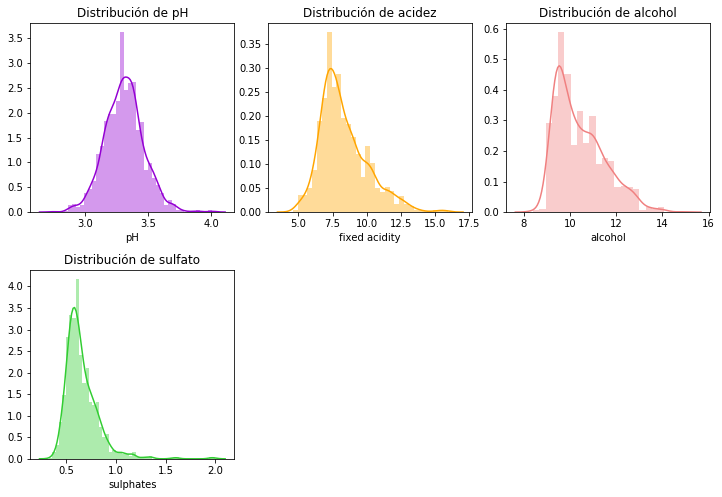

In [11]:
plt.figure(figsize = (10,10))
plt.subplot(3,3,1)
sns.distplot(data_ph ,color ='darkviolet')
plt.title('Distribución de pH')
plt.subplot(3,3,2)
sns.distplot(data_a ,color='orange')
plt.title('Distribución de acidez')
plt.subplot(3,3,3)
sns.distplot(data_al ,color='lightcoral')
plt.title('Distribución de alcohol')
plt.subplot(3,3,4)
sns.distplot(data_s ,color='limegreen')
plt.title('Distribución de sulfato')
plt.tight_layout()
plt.show()


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [12]:
# Funciones a usar

#Función histograma:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            xlabel:'x label',
                            ylabel: 'y label',
                            title: 'title'):
    '''Función para graficar el histograma de una distribución discreta'''
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)),y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    
# Función que ajusta las mejores distribuciones

# Observación gráfica, selección de distribución óptima
def best_fit_params(variable: "Variable aleatoria a ajustar"):
    """
    Función de ajuste para distribución óptima de variables aleatorias.
    Esta función recibe sólo una variable, "variable", la cuál es una de las variables aleatorias
    utilizadas en este proyecto.
    Crea un sample de la variable aleatoria para evitar tener que trabajar con todos los datos,
    esta sample se almacena en la variable datos. Luego, genera un histograma del sample para dar
    una idea de como se ve la variable aleatoria. Se almacena en la variable x el eje x del
    histograma. Se crea una variable llamada dist, que consiste en una lista de las primeras
    50 distribuciones continuas en la librería stats de scipy, además de la variable de
    referencia normal. Se crea un dataFrame de error para registrar el error cuadrático promedio.
    Se itera sobre la lista de distribuciones, se encuentra el error y se almacena en el dataFrame.
    Ordena el dataframe de menor a mayor, se almacena un slice de los primeros 5 valores y se 
    crea una lista de estas distribuciones. Por último, itera sobre el slice de los 5 valores,
    y grafica las funciones de densidad de probabilidad sobre el histograma para mostrar el 
    resultado. Se almacenan los parámetros de estas funciones en una lista.
    Esta función regresa la distribución con menor error y sus parámetros, en dos variables.
    (distribucion, parametros = best_fit_params(variable))
    """
    datos = variable.sample(1000)
    y,x,_ = plt.hist(datos,bins="auto",density=True)
    x = x[1:]
    dist = [d for d in dir(st) if isinstance(getattr(st,d),getattr(st,"rv_continuous"))]
    dist = dist[0:50] + ["norm"]
    error = pd.DataFrame(index = dist, columns=["error"])
    for d in dist:
        params = getattr(st,d).fit(datos)
        y_hat = getattr(st,d)(*params).pdf(x)
        error.loc[d] = ((y - y_hat)**2).mean()
    menor_error = error.sort_values(by="error")
    menor_error = menor_error[0:5]
    dists_menor_error = menor_error.index
    distribucion_menor_error = []
    parametros = []
    for d in dists_menor_error:
        distribucion_menor_error.append(getattr(st,d))
        params = getattr(st,d).fit(datos)
        y_hat = getattr(st,d)(*params).pdf(x)
        parametros.append(params)
        plt.plot(x,y_hat,label=d)
    plt.legend()
    return distribucion_menor_error[0], parametros[0]



#Prueba de intervalos de confianza
def intervalo_confianza(m:"Media de la distribución original",
                        sim:"Variable simulada",
                        c ="Intervalo de confianza"):
    """
    Esta función crea una estimación del intervalo de confianza para la media de la variable simulada, y genera prueba de
    hipótesis, además de aceptarla o rechazarla, para una variable aleatoria normal. Imprime el intervalo de confianza para
    t-Student, normal, la media calculada de la variable simulada, una media rechazable, el estadístico de student, el valor
    de p para la prueba, la región de rechazo y el cálculo del estadístico de prueba teórico (uf!)
    """
    N = len(sim)
    i_t = st.t.interval(c, len(sim)-1, loc=np.mean(sim), scale=st.sem(sim))
    i_n = st.norm.interval(c, loc=np.mean(sim), scale=st.sem(sim))
    media_calc = np.mean(sim)
    # prueba de hipotesis para H0= mu=media2
    ho = st.ttest_1samp(sim, media_calc)
    # Calculamos el estadístico normalizado
    t = (np.mean(sim) - media_calc)/(np.std(sim) / np.sqrt(N))
    # Cálculo de la región de rechazo
    cuantil = st.t(N-1).cdf(c/2)
    print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(c,i_t))
    print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(c,i_n))
    print('Media calculada' ,np.mean(sim))
    print('La prueba de hipótesis arroja como resultado\n',ho)
    print('Cálculo del estadístico de prueba teórico=', t)
    print(f'Región de rechazo = (t<{-cuantil}) U (t>{cuantil})')
    if ho.pvalue > c:
        print("Se acepta la hipótesis nula, la media es igual a",media_calc,"con un",c,"% de confianza.")
    else:
        print("Se rechaza la hipótesis nula. La media es diferente de",media_calc)
        
# Reducción de varianza, estratificación
def estratificacion(B = 1000):
    """
    Función estratificación: 
    Esta función crea B números aleatorios uniformes estratificados, con el propósito de reducir
    la varianza en la función aleatoria creada.
    Valor Default B es 1000. Esto quiere decir que se crearán 1000 aleatorios espaciados
    uniformemente.
    """
    i = np.arange(0,B)
    U = np.random.rand(B)
    return (U + i)/B
def estrat(a,b,N: "Cantidad de números a generar"):
    U = np.random.rand(N)
    i = np.arange(0,N)
    return (b-a)*((U + i)/N)+a
# Generación de variables aleatorias

#Función aceptación / rechazo
def a_r(f: "Función KDE",f_max: "Máximo de la función",dom: "Dominio de la función" ,N = 1000):
    """
    Función Aceptación/Rechazo. Esta función crea variables aleatorias mediante el criterio de
    aceptación rechazo, a partir de la función generada por el KDE anteriormente. Recibe la 
    función generada por el KDE, el máximo de esta función, y un vector de aleatorios uniformes.
    Se recomienda que el vector de aleatorios uniformes sea generado mediante estratificación.
    Si la función no recibe un vector de uniformes, genera uno mediante la función estratificación
    por default.
    
    """
    a = dom[0]
    b = dom[-1]
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,f_max) 
        R1 = np.random.uniform(a,b,1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X
    
# Para KDE:
def kde_statsmodels_m(x, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    from statsmodels.nonparametric.kernel_density import KDEMultivariate
    kde = KDEMultivariate(x, 
                          #bw=0.1,  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return lambda x_grid: kde.pdf(x_grid)

def max_func(f: 'Función de KDE a maximizar',
             dominio: 'Espacio generado para el KDE'):
    """
    Función maximizador de función. Esta función maximiza la función obtenida por el KDE en el 
    dominio generado para esta misma (generalmente variable space). Regresa el máximo. Necesaria
    para la función de aceptación rechazo.
    """
    from scipy import optimize
    x = dominio
    return f(optimize.fmin(lambda x:-f(x),0,disp=False))

# Transformada inversa
def trans_inversa(dist, params, size):
    y_hat = dist.rvs(*params,size)
    return y_hat

# Prueba cuantil cuantil
def qq(var: "Variable a comprobar",dist: "Distribución a comprobar",params: "Parámetros distribución"):
    """
    Función qq. Prueba cuantil cuantil. Esta función crea el plot de la prueba cuantil cuantil,
    ("qq"), para la variable dada y la distribución dada. La variable debe ser la colección de 
    frecuencias de una variable aleatoria generada. La distribución debe ser dada por la librería
    Stats de Scipy. No regresa valores. Grafica el plot de la prueba qq.
    """
    fig, ax = plt.subplots(2,1)
    y,x,_ = ax[0].hist(var,bins="auto",density=True)
    x = x[:-1]
    y2 = dist.pdf(x,*params)
    ax[0].plot(x,y,"g--")
    ax[0].set_ylabel("Probabilidad")
    import statsmodels.api as sm
    sm.qqplot(var,dist = dist,line = "q",fit = True,ax = ax[1])
    plt.grid()
    ax[1].set_ylabel("Cuantiles")
    
#Chi cuadrada    
def chi2(dist: "Distribución a probar",param: "Parámetros",y: "Frecuencias",x:"Histograma"):
    """
    Prueba de Chi Cuadrada. Esta función realiza la prueba de chi cuadrada para una distribución
    dada, con parámetros dados, y el histograma de la distribución obtenido. Obtiene la función
    de distribución de probabilidad de la distribución dada, y calcula el estadístico de Chi2
    para poder determinar si se acepta o se rechaza la Hipótesis Nula. Calcula los grados de 
    libertad en base a la longitud de datos recibidos del histograma. No regresa valores.
    """
    J = len(x)
    pi = dist.pdf(x,*param)
    #Cálculo de Esperanza de la distribución teórica
    Ei = x*pi
    #Cálculo teórico de la chi2
    chi2 = ((y - Ei)**2 / Ei).sum()
    print("Valor teórico de Chi2 =",chi2)
    #Cálculo mediante librería de chi2
    CHI2 = st.chisquare(y,Ei)
    print("Valor por librería de Chi2 =",CHI2)
    #Grados de libertad
    m = J-1
    #Obtención del estadístico de Chi2
    Chi_st = st.chi2.ppf(q = 0.95,df = m)
    print("Estadístico de Chi2 =", Chi_st)
    
# Prueba Kolmogorov-Smirnov.
def smirnoff_de_tamarindo(var,dist,p):
    d, pvalor = st.kstest(var,lambda x: dist.cdf(x,*p))
    #Confianza al 95%
    if pvalor < 0.05:
        print('No se ajusta a la distribución establecida')
    else:
        print('Se puede ajustar a la distribución establecida') 


# <font color = 'green'> Nodo 1: pH 

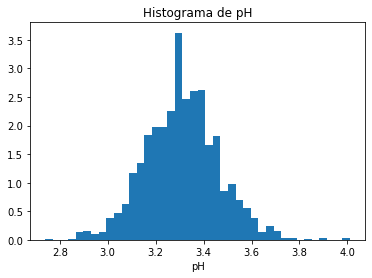

In [11]:
y,x,_ = plt.hist(data_ph,
                 bins = 'auto',
                 density = True)
plt.xlabel('pH')
plt.title('Histograma de pH');

> Observamos que nuestro histograma parece tener una distribución $N~(1,0)$, sin embargo, podemos observar que hay un valor que se sale de ese rango y se tiene 3.5. Es por esto, que decidimos hacer una transformación logarítmica para poder seguir con los cálculos necesarios de este primer nodo.

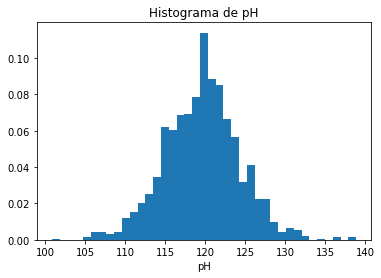

In [12]:
# Histograma de pH
ndata_ph = np.log(data_ph) * 100   
y, x , _ = plt.hist(ndata_ph, 
                    bins = 'auto', 
                    density = True)
plt.xlabel('pH')
plt.title('Histograma de pH');

## Funciones de ajuste de distribución

### Plantemiento de Hipótesis:
> $H_0$: Los datos tienen una distribución bur112

> $H_A$: Los datos no tienen una distribución bur112

(44.565400735459384, 1.1886278428529171, -1.223027921630279, 121.5865409032002)

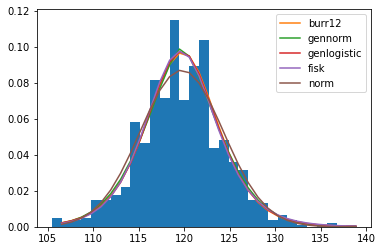

In [13]:
dist , p = best_fit_params(ndata_ph)
p

De acuerdo a Scipy, la mejor disstribución es **bur12**

##  Kolmogorov-Smirnov

In [14]:
smirnoff_de_tamarindo(ndata_ph,dist,p)

No se ajusta a la distribución establecida


### Comprobación de distribución beta con $Chi^2$

In [15]:
chi2(dist, p, y, x[:-1])

Valor teórico de Chi2 = 120.41757780144314
Valor por librería de Chi2 = Power_divergenceResult(statistic=120.41757780144314, pvalue=1.695690320292886e-10)
Estadístico de Chi2 = 53.383540622969356


Consideramos que nuestro **p_value** es bajo, por lo tanto aceptamos la $H_0$

### Comprobación de distribución beta con $Q-Q$

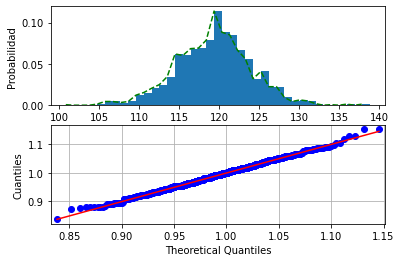

In [16]:
qq(ndata_ph, dist, p)

### Kernel Density Estimation:

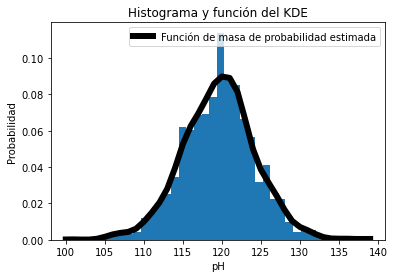

In [17]:
dom = np.arange(100, 140)
plt.hist(ndata_ph,
        bins = 'auto',
        density = True)
f = kde_statsmodels_m(ndata_ph)
plt.plot(dom, 
         f(dom),
        label = 'Función de masa de probabilidad estimada',
        color = 'k',
        linewidth = 6)
plt.xlabel('pH')
plt.ylabel('Probabilidad')
plt.title('Histograma y función del KDE')
plt.legend()
plt.show();

> Encontramos que la mejor distribución que se ajusta a nuestros valores es **Burr12** de Scipy

## Creación de variables aleatorias

### 1. Método Transformada Inversa

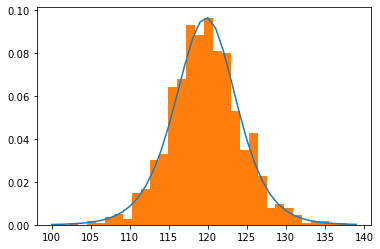

In [18]:
ph_sim = trans_inversa(dist, p, 1000)
plt.plot(dom, dist(*p).pdf(dom))
plt.hist(ph_sim, bins = 'auto', density = True);

### Método Aceptación y Rechazo

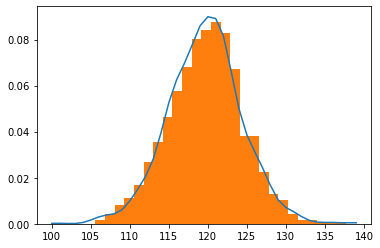

In [19]:
#Obtenciòn del màximo mediante observaciòn analìtica (funciòn màximo funcionando incorrectamente para estos datos)
maximo = 0.085
ph_sim2 = a_r(f, maximo, dom)
plt.plot(dom,f(dom))
plt.hist(ph_sim2,bins = 'auto' ,density = True);

### Media mediante MonteCarlo

In [20]:
# Regresarlo a 1000 simulaciones 
montecarlo_ph = np.array([a_r(f, maximo, dom).mean() for i in range(1000)]).mean()

In [21]:
#Regresar al dominio original mediante la operaciòn inversa
montecarlo_ph_exp = np.exp(montecarlo_ph / 100)


In [22]:
media_estratificada = np.mean(ph_sim2)
media_real = np.mean(data_ph)
print('Media estratificada:', np.exp(media_estratificada / 100))
print('Media datos originales: ', media_real)

Media estratificada: 3.3107192647773975
Media datos originales:  3.311113195747343


In [23]:
estratificada = np.std(np.exp(ph_sim2 / 100))
real = np.std(data_ph)
print('Desviación estándar estratificada:', estratificada)
print('Desviación estándar con datos originales: ', real)

Desviación estándar estratificada: 0.15790135006995773
Desviación estándar con datos originales:  0.15433818141060152


# Pruebas de Bondad de Ajuste e Hipótesis 

## Intervalo de confianza de la media

In [24]:
# Media de pH
media_ph = data_ph.mean()
media_ph

3.311113195747343

In [25]:
# Intervalo de confianza
intervalo_confianza(media_ph, ph_sim,.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (119.40772784959113, 119.97679341855105)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (119.4080725755466, 119.97644869259558)
Media calculada 119.69226063407109
La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Cálculo del estadístico de prueba teórico= 0.0
Región de rechazo = (t<-0.6825546003581691) U (t>0.6825546003581691)
Se acepta la hipótesis nula, la media es igual a 119.69226063407109 con un 0.95 % de confianza.


### Conclusiones

Este es nuestro primer nodo, con el cuál nos dará una guía para poder aceptar y continuar con la simulación de los nodos o rechazar desde un principio y desechar el lote. El ph es escencial en los vinos y dependiendo de sus niveles es la calidad que debe de tener o si cambia de tipo de vino. Al realizar todo el proceso de ajustar las distribuciones para crear las variables aleatorias con el fin de realizar la simulación montecarlo nos dio un resultado después de 1000 simulaciones donde comprobamos que con respecto al ph obtuvimos un resultado de 3.3120, comparandolo contra os datos reales que fue de 3.3111, es por ello que no se rechaza este nodo y se sigue con las siguientes simulaciones de los nodos. 

# <font color = 'Red'> Nodo 2: Acidez

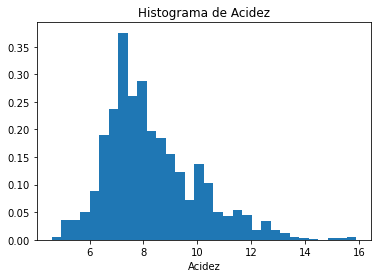

In [26]:
y,x,_ = plt.hist(data_a,
                 bins = 'auto',
                 density = True)
plt.xlabel('Acidez')
plt.title('Histograma de Acidez');

## Funciones de ajuste de distribución

### Plantemiento de Hipótesis:
> $H_0$: Los datos tienen una distribución burr12

> $H_A$: Los datos no tienen una distribución bur12

(6255.410385970122,
 0.32304546371646264,
 -3184.3239629558943,
 3191.269217965031)

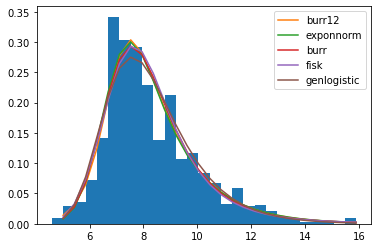

In [27]:
dist , p = best_fit_params(data_a)
p

De acuerdo a Scipy, la mejor distribución es **burr12**

## Kolmogorov-Smirnov

In [28]:
smirnoff_de_tamarindo(data_a,dist,p)

No se ajusta a la distribución establecida


## Comprobación de distribución beta con $Chi^2$

In [29]:
chi2(dist, p, y, x[:-1])

Valor teórico de Chi2 = 18.039798141251477
Valor por librería de Chi2 = Power_divergenceResult(statistic=18.039798141251477, pvalue=0.9690607259607884)
Estadístico de Chi2 = 44.98534328036513


**p-value** es casi 1, por lo tanto se acepta $H_A$.

### Comprobación de distribución beta con $Q-Q$

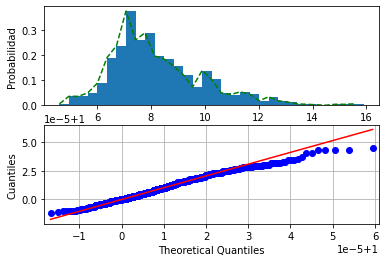

In [30]:
qq(data_a, dist, p)

### Kernel Density Estimation:

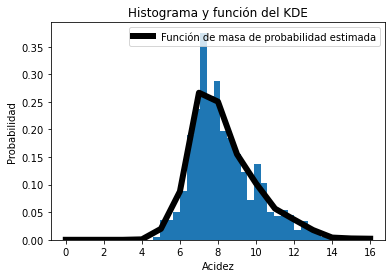

In [31]:
dom = np.arange(0, 17)
plt.hist(data_a,
        bins = 'auto',
        density = True)
f = kde_statsmodels_m(data_a)
plt.plot(dom, 
         f(dom),
        label = 'Función de masa de probabilidad estimada',
        color = 'k',
        linewidth = 6)
plt.xlabel('Acidez')
plt.ylabel('Probabilidad')
plt.title('Histograma y función del KDE')
plt.legend()
plt.show();

> Encontramos que la mejor distribución que se ajusta a nuestros valores es **burr12** de Scipy

## Creación de variables aleatorias

### 1. Método Transformada Inversa

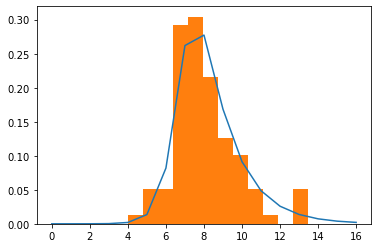

In [32]:
a_sim = trans_inversa(dist, p, 100)
plt.plot(dom, dist(*p).pdf(dom))
plt.hist(a_sim, bins = 'auto', density = True);

### Método Aceptación y Rechazo

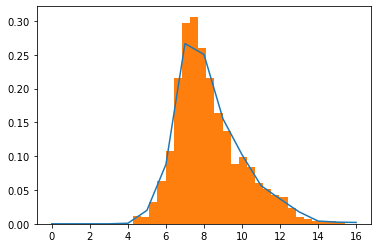

In [33]:
maximo = max_func(f,dom)
a_sim2 = a_r(f, maximo, dom)
plt.plot(dom,f(dom))
plt.hist(a_sim2,bins = 'auto' ,density = True);

### Media mediante MonteCarlo

In [34]:
# Regresarlo a 1000 simulaciones 
montecarlo_a = np.array([a_r(f,maximo,dom).mean() for i in range(1000)]).mean()

In [35]:
media_estratificada = np.mean(a_sim2)
media_real = np.mean(data_a)
print('Media estratificada:', media_estratificada)
print('Media datos originales:', media_real)

Media estratificada: 8.267296160305461
Media datos originales: 8.319637273295838


In [36]:
estratificada = np.std(a_sim2)
real = np.std(data_a)
print('Desviación estándar estratificada:', estratificada)
print('Desviación estándar con datos originales: ', real)

Desviación estándar estratificada: 1.7465318030873571
Desviación estándar con datos originales:  1.7405518001102782


# Pruebas de Bondad de Ajuste e Hipótesis 

## Intervalo de confianza de la media

In [37]:
# Media de acidez
media_a = data_a.mean()
media_a

8.319637273295838

In [38]:
# Intervalo de confianza
intervalo_confianza(media_a, a_sim,.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (7.7420100184762415, 8.433882421285896)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (7.74623837629747, 8.429654063464668)
Media calculada 8.087946219881069
La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Cálculo del estadístico de prueba teórico= 0.0
Región de rechazo = (t<-0.6820833921067933) U (t>0.6820833921067933)
Se acepta la hipótesis nula, la media es igual a 8.087946219881069 con un 0.95 % de confianza.


### Conclusiones

La acidez es una variable importante para los vinos y esta está relacionada con el ph, por lo tanto se hace la suposición de que si hay un ph dentro de los parámetros establecidos la acidez estaría igual en los parámetros establecidos. La suposición fue correcta por lo que nos damos cuenta que el ph y la acidez tienen una gran relación. En los datos reales nos arrojó un resultado de 8.3196 mientra que el resultado de nuestra simulación nos da como resultado 8.28178. Con esto vemos que lo obtenido esta dentro de los rangos y no se desecha el lote, además, podemos seguir con la simulación de los siguientes nodos. 

# <font color = 'blue'> Nodo 3: Alcohol

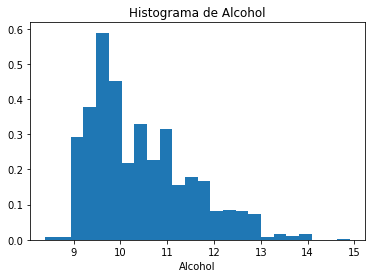

In [39]:
y,x,_ = plt.hist(data_al,
                 bins = 'auto',
                 density = True)
plt.xlabel('Alcohol')
plt.title('Histograma de Alcohol');

## Funciones de ajuste de distribución

### Plantemiento de Hipótesis:
> $H_0$: Los datos tienen una distribución burr12

> $H_A$: Los datos no tienen una distribución bur12

(25432.052079700275,
 0.12218207448340396,
 -3759.9416212561587,
 3769.190372149081)

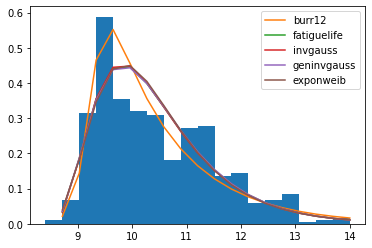

In [40]:
dist , p = best_fit_params(data_al)
p

## Kolmogorov-Smirnov

In [41]:
smirnoff_de_tamarindo(data_al,dist,p)

No se ajusta a la distribución establecida


## Comprobación de distribución beta con $Chi^2$

In [42]:
chi2(dist, p, y, x[:-1])

Valor teórico de Chi2 = 30.95952585033262
Valor por librería de Chi2 = Power_divergenceResult(statistic=30.95952585033262, pvalue=0.12379071739942561)
Estadístico de Chi2 = 35.17246162690806


**p-value** es 0.12 > 0.05, por lo tanto se rechaza $H_0$.

### Comprobación de distribución beta con $Q-Q$

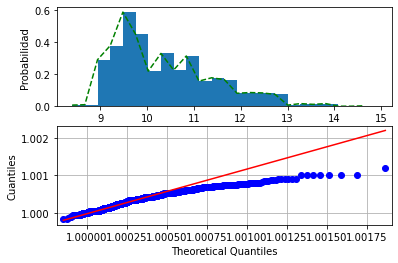

In [43]:
qq(data_al, dist, p)

### Kernel Density Estimation:

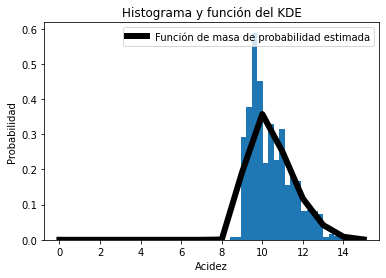

In [44]:
dom = np.arange(0, 16)
plt.hist(data_al,
        bins = 'auto',
        density = True)
f = kde_statsmodels_m(data_al)
plt.plot(dom, 
         f(dom),
        label = 'Función de masa de probabilidad estimada',
        color = 'k',
        linewidth = 6)
plt.xlabel('Acidez')
plt.ylabel('Probabilidad')
plt.title('Histograma y función del KDE')
plt.legend()
plt.show();

## Creación de variables aleatorias

### 1. Método Transformada Inversa

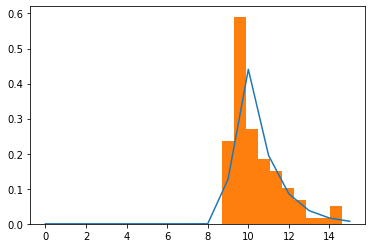

In [45]:
al_sim = trans_inversa(dist, p, 100)
plt.plot(dom, dist(*p).pdf(dom))
plt.hist(al_sim, bins = 'auto', density = True);

### Método Aceptación y Rechazo

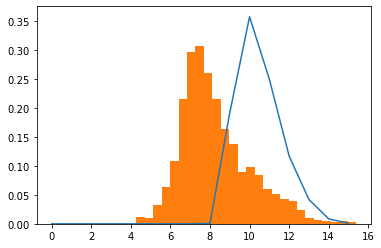

In [46]:
maximo = max_func(f,dom)
al_sim2 = a_r(f, maximo, dom)
plt.plot(dom,f(dom))
plt.hist(a_sim2,bins = 'auto' ,density = True);

### Media mediante MonteCarlo

In [47]:
# Regresarlo a 1000 simulaciones 
montecarlo_al = np.array([trans_inversa(dist, p, 100).mean() for i in range(1000)]).mean()

In [48]:
media_estratificada = np.mean(al_sim)
media_real = np.mean(data_al)
print('Media estratificada:', media_estratificada)
print('Media datos originales:', media_real)

Media estratificada: 10.38313115617706
Media datos originales: 10.422983114446502


In [49]:
estratificada = np.std(al_sim2)
real = np.std(data_al)
print('Desviación estándar estratificada:', estratificada)
print('Desviación estándar con datos originales: ', real)

Desviación estándar estratificada: 1.09679248950744
Desviación estándar con datos originales:  1.0653343003437463


# Pruebas de Bondad de Ajuste e Hipótesis

## Intervalo de confianza de la media

In [50]:
# Media de alcohol
media_al = data_al.mean()
media_al

10.422983114446502

In [51]:
# Intervalo de confianza
intervalo_confianza(media_al, al_sim,.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (10.127278021269774, 10.638984291084345)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (10.130405299073246, 10.635857013280873)
Media calculada 10.38313115617706
La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Cálculo del estadístico de prueba teórico= 0.0
Región de rechazo = (t<-0.6820833921067933) U (t>0.6820833921067933)
Se acepta la hipótesis nula, la media es igual a 10.38313115617706 con un 0.95 % de confianza.


### Conclusiones 

Establecimos que nuestro alcohol tendría que estar en un rango de entre 7-16 para poder pasar aceptarlo y continuar con el lote de vino. De acuerdo a las simulaciones que se hicieron, podemos ver que nuestros resultados son favorables, ya que, nos da una media estratifica de 10.32 vs una media del valor real de 10.42. Consideramos que los resultados son aproximados, por lo cual, decidimos quedarnos con este lote y seguir con la fabricación de vino. 

# <font color = 'purple'> Nodo 4: Sulfato

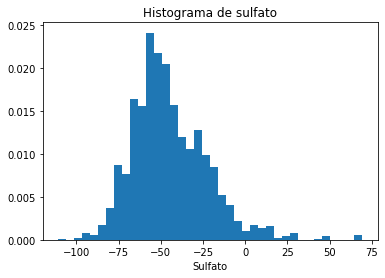

In [15]:
ndata_s = np.log(data_s) * 100 
y,x,_ = plt.hist(ndata_s,
                 bins = 'auto',
                 density = True)
plt.xlabel('Sulfato')
plt.title('Histograma de sulfato');

## Funciones de ajuste de distribución

### Plantemiento de Hipótesis:
> $H_0$: Los datos tienen una distribución burr12

> $H_A$: Los datos no tienen una distribución bur12

(1.3304076578197264, -46.20354613331902, 23.62038978316889)

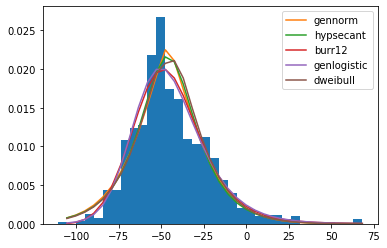

In [16]:
dist , p = best_fit_params(ndata_s)
p

De acuerdo a Scipy, la mejor distribución es gnnorm

## Kolmogorov-Smirnov

In [17]:
smirnoff_de_tamarindo(ndata_s,dist,p)

No se ajusta a la distribución establecida


## Comprobación de distribución beta con $Chi^2$

In [58]:
chi2(dist, p, y, x[:-1])

Valor teórico de Chi2 = -10.035174779417616
Valor por librería de Chi2 = Power_divergenceResult(statistic=-10.035174779417616, pvalue=1.0)
Estadístico de Chi2 = 52.192319730102895


**p-value** es 0.12 > 0.05, por lo tanto se rechaza $H_0$. y se acepta la $H_A$

### Comprobación de distribución beta con $Q-Q$

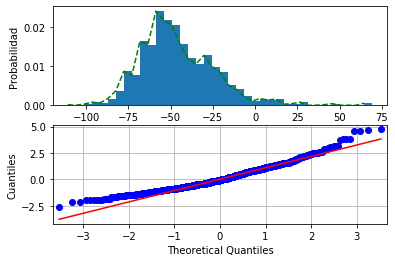

In [19]:
qq(ndata_s, dist, p)

### Kernel Density Estimation:

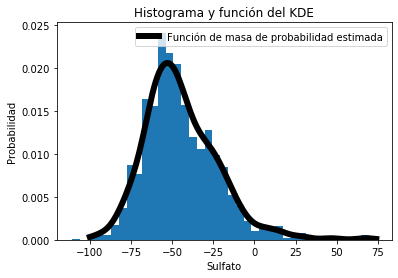

In [26]:
dom = np.arange(-100, 75)
plt.hist(ndata_s,
        bins = 'auto',
        density = True)
f = kde_statsmodels_m(ndata_s)
plt.plot(dom, 
         f(dom),
        label = 'Función de masa de probabilidad estimada',
        color = 'k',
        linewidth = 6)
plt.xlabel('Sulfato')
plt.ylabel('Probabilidad')
plt.title('Histograma y función del KDE')
plt.legend()
plt.show();

## Creación de variables aleatorias

### 1. Método Transformada Inversa

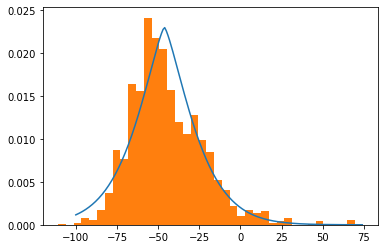

In [27]:
s_sim = trans_inversa(dist, p, 100)
plt.plot(dom, dist(*p).pdf(dom))
plt.hist(ndata_s, bins = 'auto', density = True);

### Método Aceptación y Rechazo

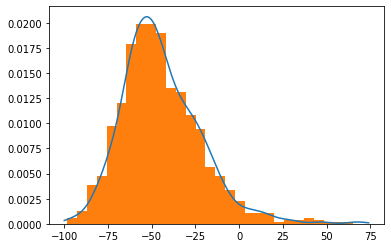

In [28]:
maximo = max_func(f,dom)
s_sim2 = a_r(f, maximo, dom)
plt.plot(dom,f(dom))
plt.hist(s_sim2,bins = 'auto' ,density = True);

### Media mediante MonteCarlo

In [33]:
# Regresarlo a 1000 simulaciones 
montecarlo_s = np.array([a_r(f, maximo, dom).mean() for i in range(1000)]).mean()

In [40]:
#Regresar al dominio original mediante la operaciòn inversa
montecarlo_s_exp = np.exp(montecarlo_s / 100)

In [42]:
media_estratificada = np.mean(s_sim2)
media_real = np.mean(data_s)
print('Media estratificada:', np.exp(media_estratificada / 100))
print('Media datos originales: ', media_real)



Media estratificada: 0.6382429318698477
Media datos originales:  0.6581488430268921


In [48]:
estratificada = np.std(np.exp(s_sim2 / 100))
real = np.std(data_s)
print('Desviación estándar estratificada:', estratificada)
print('Desviación estándar con datos originales: ', real)



Desviación estándar estratificada: 0.1741470514873951
Desviación estándar con datos originales:  0.16945396724179526


# Pruebas de Bondad de Ajuste e Hipótesis

## Intervalo de confianza de la media

In [56]:
# Media de sulfato
media_s = np.mean(data_s)
media_s

0.6581488430268921

In [55]:
# Intervalo de confianza
intervalo_confianza(media_s, s_sim2,.95)

Con una confianza de 0.95 la media estará en el intervalo t,
 (-46.33623903079768, -43.47102040046962)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (-46.334503351670605, -43.47275607959669)
Media calculada -44.90362971563365
La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Cálculo del estadístico de prueba teórico= 0.0
Región de rechazo = (t<-0.6825546003581691) U (t>0.6825546003581691)
Se acepta la hipótesis nula, la media es igual a -44.90362971563365 con un 0.95 % de confianza.
